In [29]:
import pandas

In [30]:
CSV_HOME = "../datasets/fma_small_flatten"

In [31]:
%matplotlib inline

import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import librosa as lb 
import librosa.display 

from sklearn.preprocessing import MultiLabelBinarizer

In [32]:
import utils

sns.set_context("notebook", font_scale=1.5)
plt.rcParams['figure.figsize'] = (17, 5)

In [33]:
file_path_1 = '000002.mp3'
file_path_2 = '000005.mp3'
file_path_3 = '003263.mp3'
file_path_4 = '010186.mp3'
file_list = [file_path_1, file_path_2, file_path_3, file_path_4]

length of data:  660984


/var/folders/np/f11s751j4dj_y_1cj4yxydpwpsr474/T/ipykernel_31862/3330909500.py:12: FutureWarning: Pass sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  lb.display.waveshow(data, sample_rate)


length of data:  661560
length of data:  660984
length of data:  660984


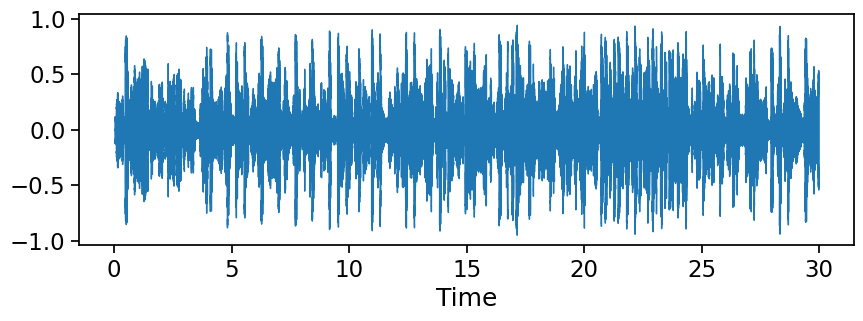

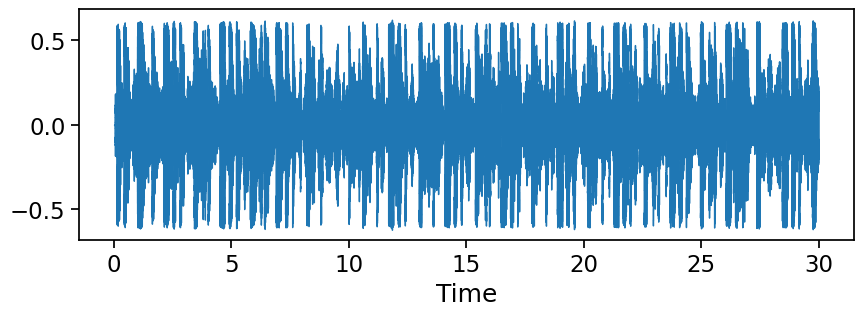

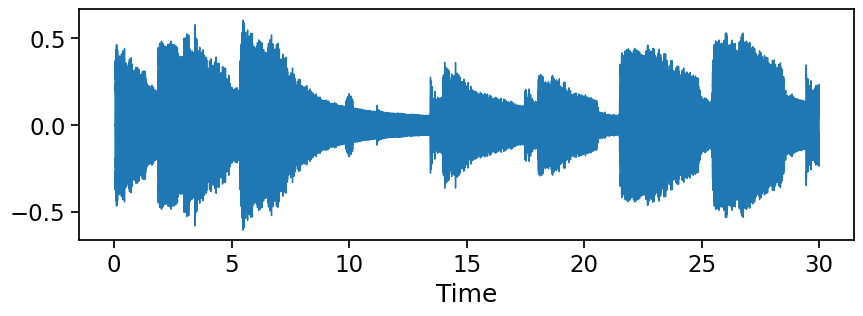

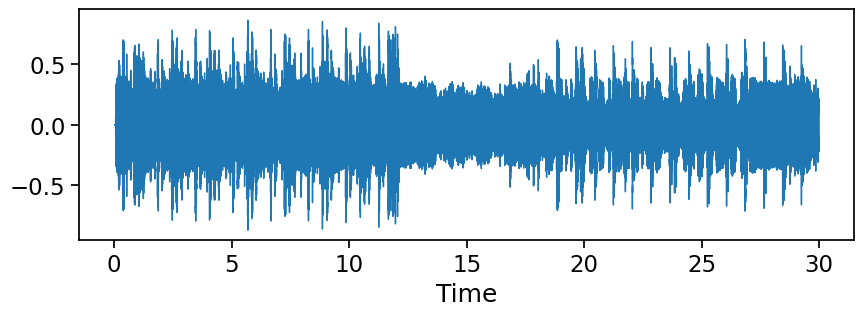

In [34]:
audio_data = []
srate = []

for index, file_path in enumerate(file_list):
  full_file_path = f"{CSV_HOME}/{file_path}"
  data, sample_rate = lb.load(full_file_path)
  audio_data.append(data)
  srate.append(sample_rate)
  plt.figure(figsize=(10,3))
  print("length of data: ", len(data))
  # print("sampling rate: ", sample_rate)
  lb.display.waveshow(data, sample_rate)

[ 0.          0.          0.         ... -0.25857893 -0.25263396
  0.        ]
(1025, 1291)


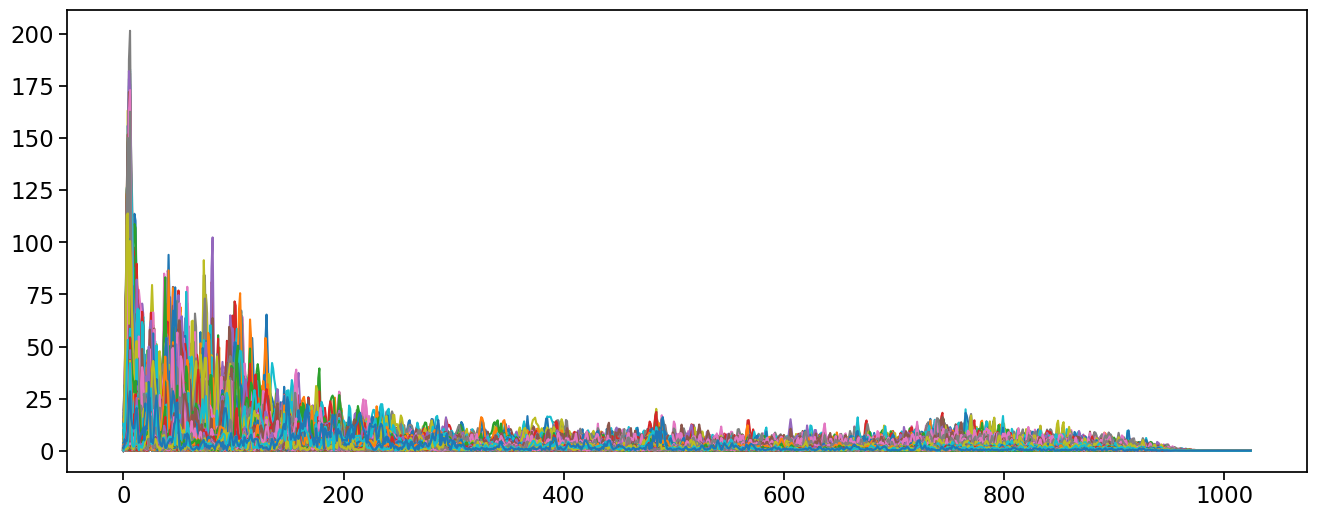

[0.         0.         0.         ... 0.07602344 0.10268474 0.        ]
(1025, 1293)


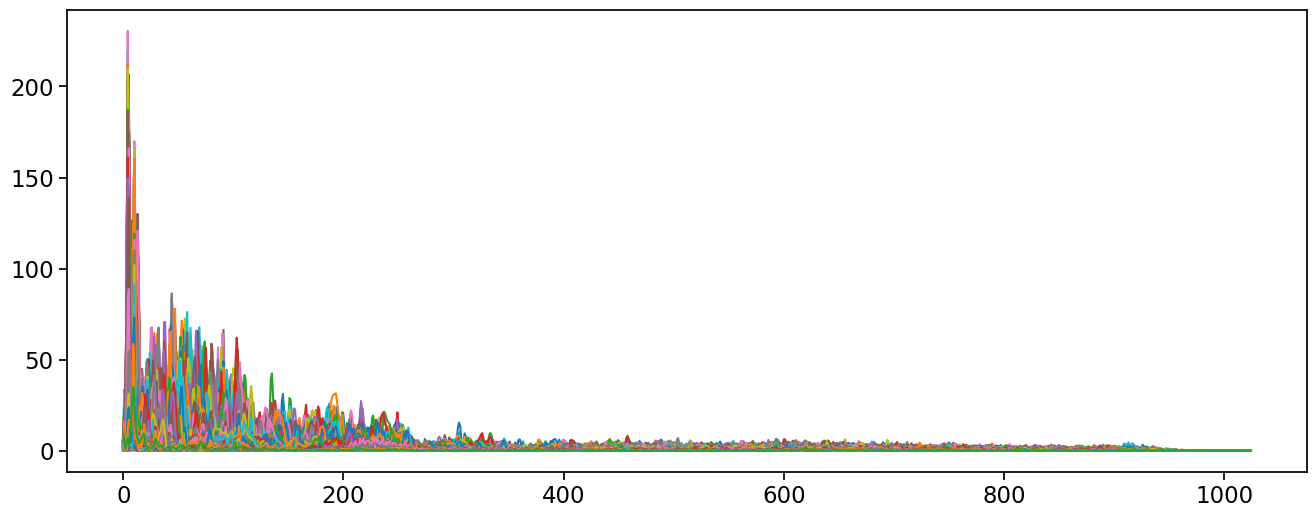

[0.         0.         0.         ... 0.02636239 0.05029048 0.        ]
(1025, 1291)


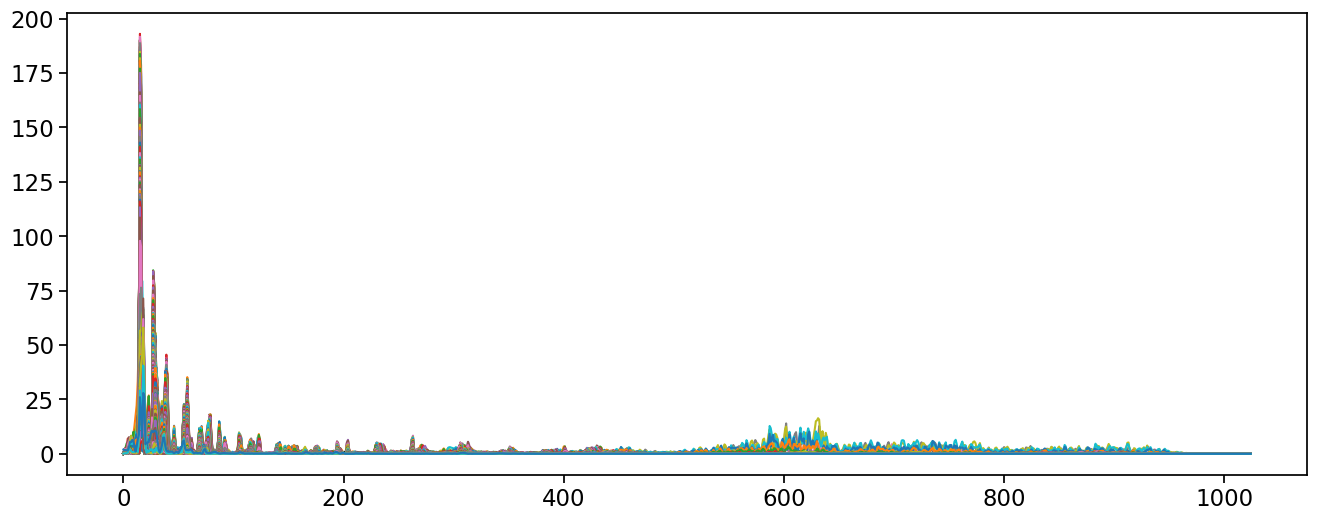

[0.         0.         0.         ... 0.143883   0.15960321 0.        ]
(1025, 1291)


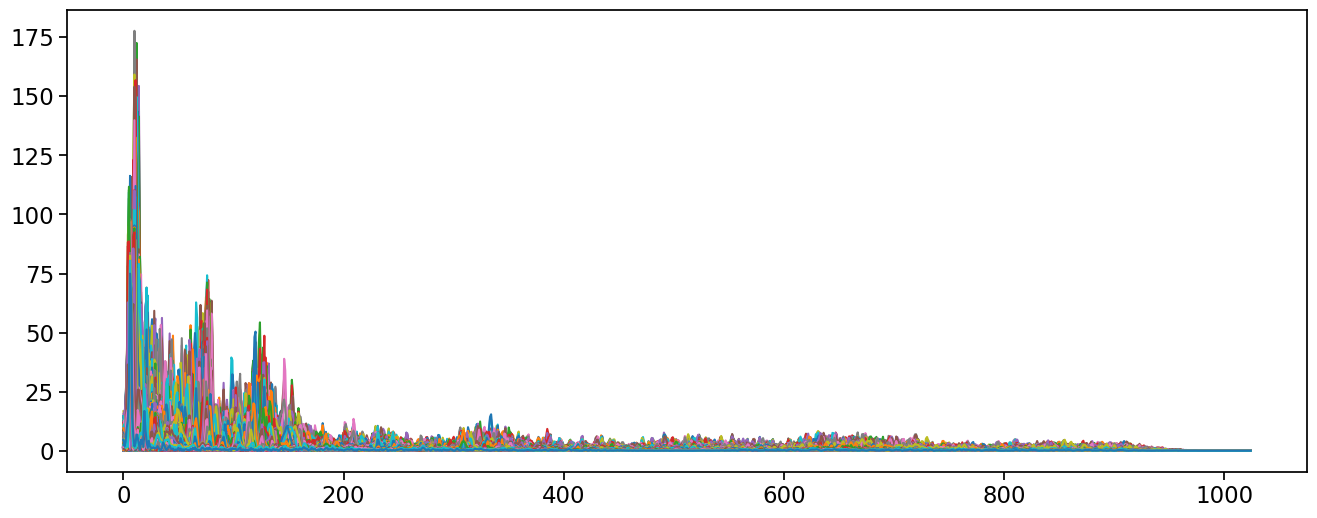

In [8]:
### Fourier Transform
### x axis : time -> frequency
### y axis : log
### color : 

N_FFT=2048
HOP_LENGTH=512

FTTS = []

for data in audio_data:
  print(data)
  D = np.abs(lb.stft(data, n_fft=N_FFT, hop_length=HOP_LENGTH))
  FTTS.append(D)
  print(D.shape)

  plt.figure(figsize=(16,6))
  plt.plot(D)
  plt.show()

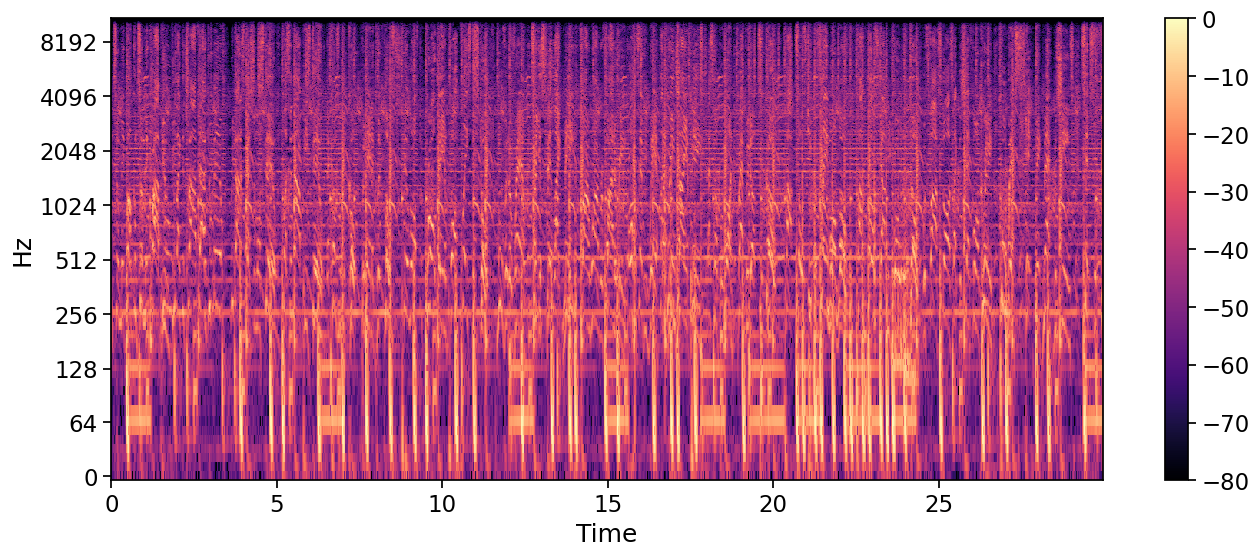

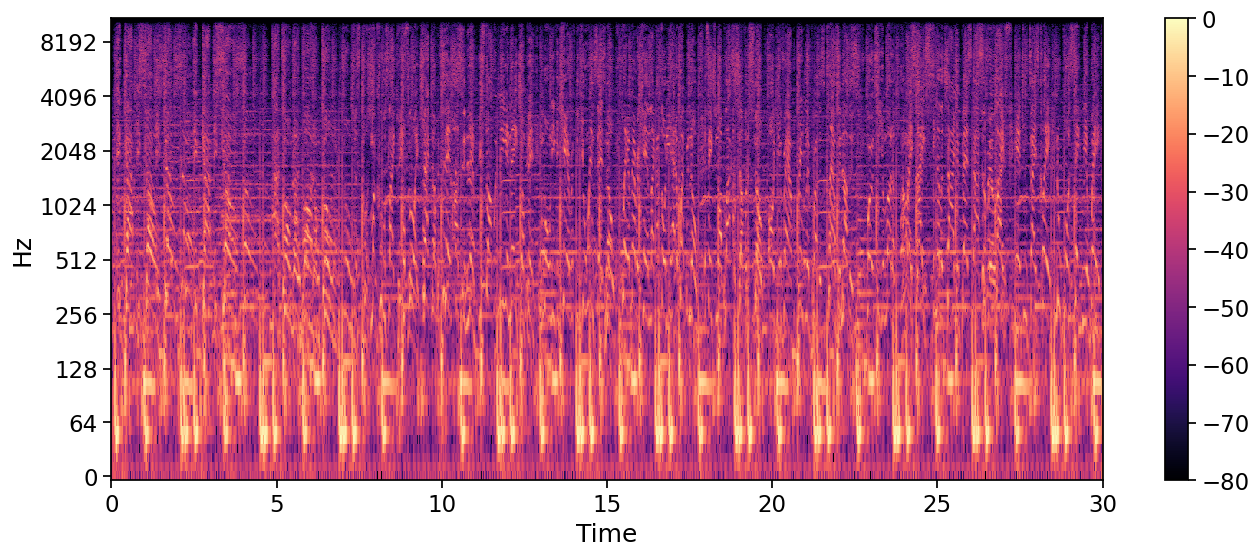

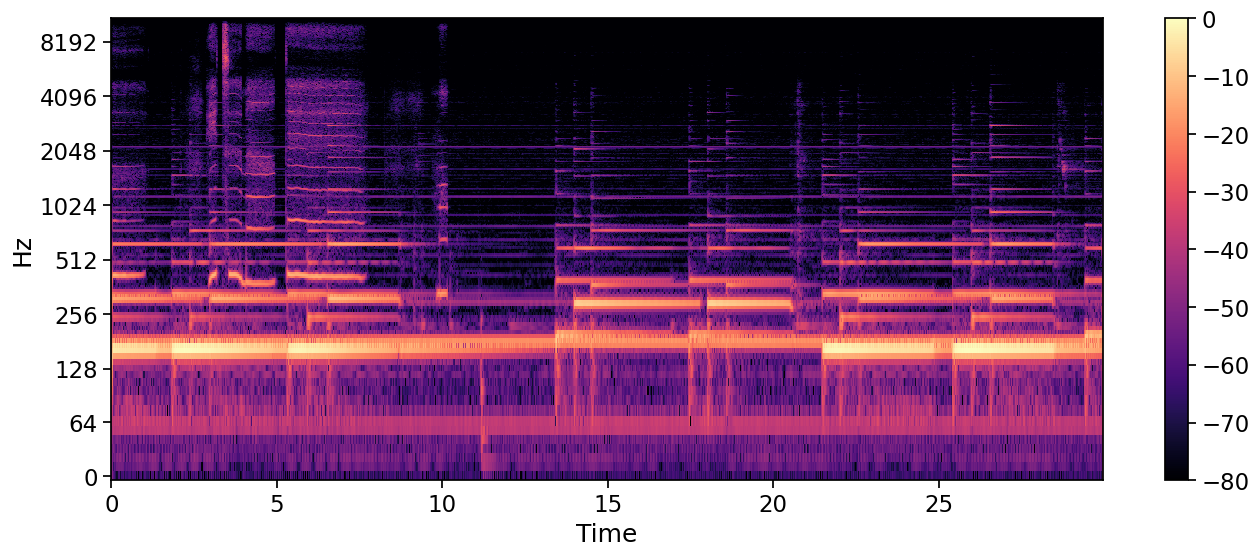

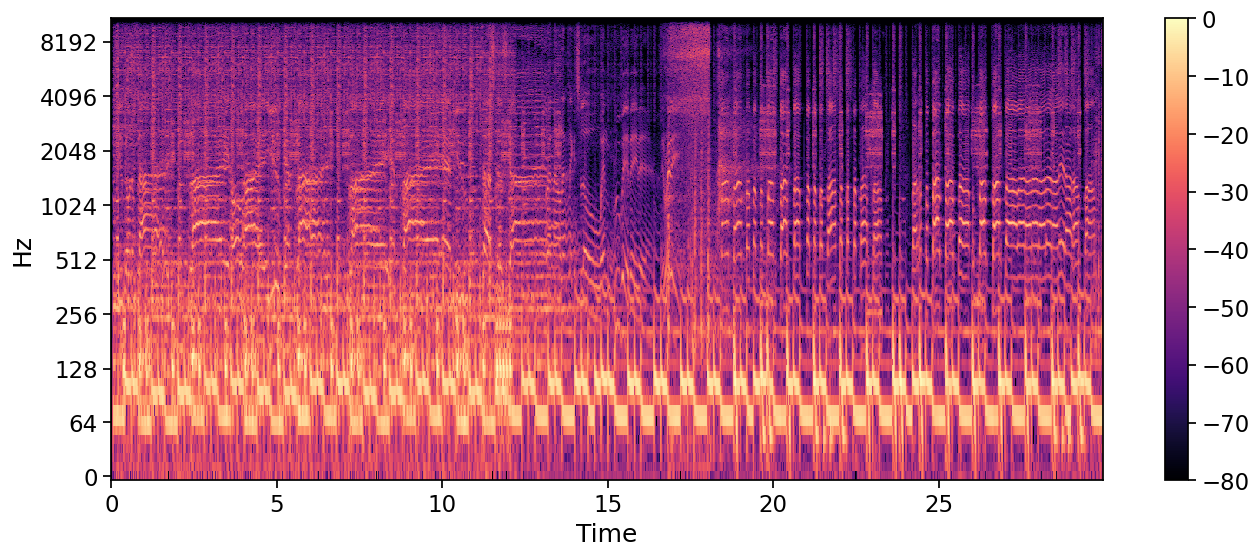

In [9]:
### spectrum (sonographs / voiceprints, voicegrams)

for d, sr in zip(FTTS, srate):
  DB = lb.amplitude_to_db(d, ref=np.max)
  plt.figure(figsize=(16,6))
  lb.display.specshow(DB, sr=sr, hop_length=512, x_axis='time', y_axis='log')
  plt.colorbar()
  plt.show()

[ 0.          0.          0.         ... -0.25857893 -0.25263396
  0.        ]


/var/folders/np/f11s751j4dj_y_1cj4yxydpwpsr474/T/ipykernel_2568/100722668.py:3: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.25857893 -0.25263396
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = lb.feature.melspectrogram(data)


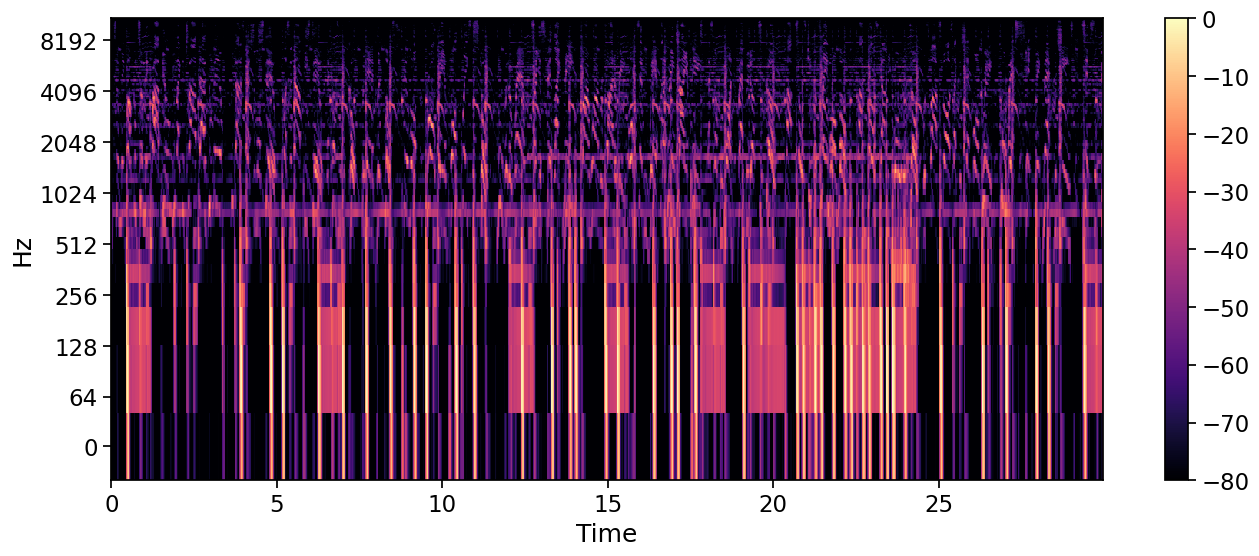

[0.         0.         0.         ... 0.07602344 0.10268474 0.        ]


/var/folders/np/f11s751j4dj_y_1cj4yxydpwpsr474/T/ipykernel_2568/100722668.py:3: FutureWarning: Pass y=[0.         0.         0.         ... 0.07602344 0.10268474 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = lb.feature.melspectrogram(data)


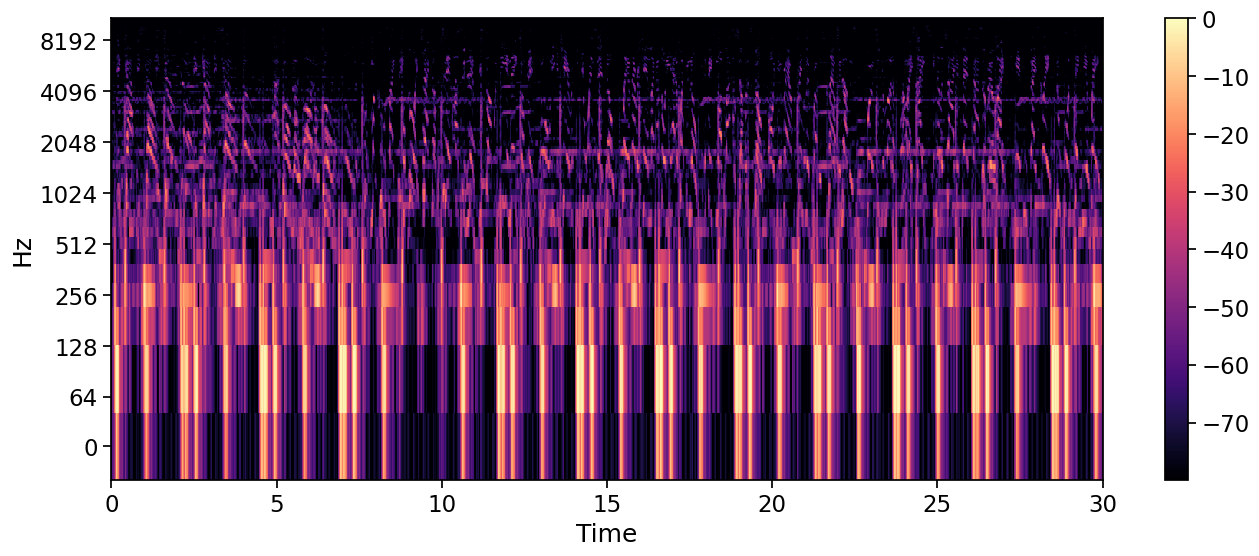

[0.         0.         0.         ... 0.02636239 0.05029048 0.        ]


/var/folders/np/f11s751j4dj_y_1cj4yxydpwpsr474/T/ipykernel_2568/100722668.py:3: FutureWarning: Pass y=[0.         0.         0.         ... 0.02636239 0.05029048 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = lb.feature.melspectrogram(data)


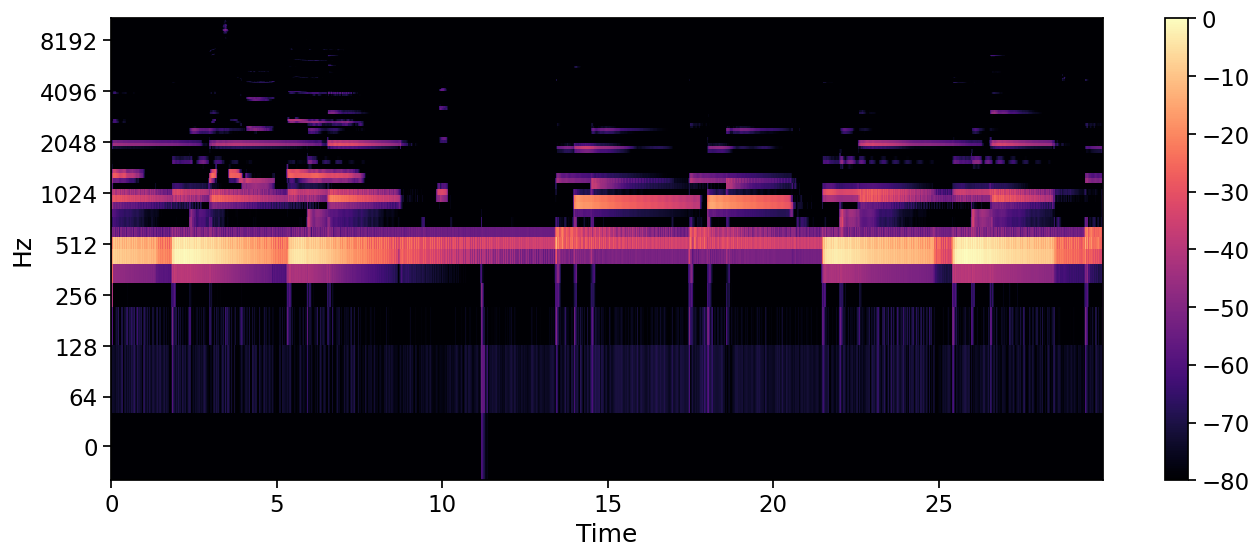

[0.         0.         0.         ... 0.143883   0.15960321 0.        ]


/var/folders/np/f11s751j4dj_y_1cj4yxydpwpsr474/T/ipykernel_2568/100722668.py:3: FutureWarning: Pass y=[0.         0.         0.         ... 0.143883   0.15960321 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = lb.feature.melspectrogram(data)


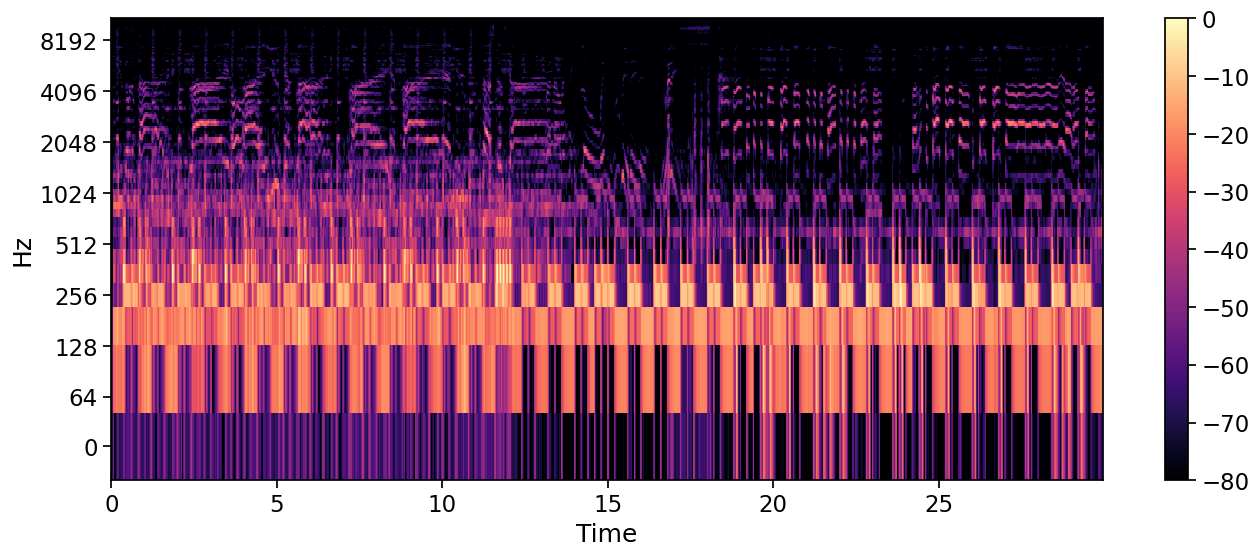

In [12]:
for data, sr in zip(audio_data, srate):
    print(data)
    S = lb.feature.melspectrogram(data)
    S_DB = lb.amplitude_to_db(S, ref=np.max)

    plt.figure(figsize=(16,6))
    lb.display.specshow(S_DB, sr=sr, hop_length=512, x_axis='time',y_axis='log')
    plt.colorbar()
    plt.show()

In [13]:
mfcc_data = []
for a, s in zip(audio_data, srate):
  mfcc_data.append(lb.feature.mfcc(y=a, sr=s))

print(mfcc_data)

[array([[-331.41913   , -203.47095   , -162.34322   , ...,  -42.017582  ,
          -9.5109625 ,   -4.97254   ],
       [  95.997345  ,   96.25718   ,   69.53171   , ...,   44.938698  ,
          57.856255  ,   66.55576   ],
       [ -25.467289  ,  -37.410378  ,  -23.40789   , ...,   -6.23892   ,
         -19.843533  ,  -29.971046  ],
       ...,
       [ -15.879406  ,  -13.265522  ,  -12.184891  , ...,    2.7261126 ,
          -0.67975605,   -1.4528624 ],
       [  -1.1280168 ,   -5.51101   ,   -6.0195312 , ...,   -6.3221803 ,
          -7.1171017 ,   -2.1005273 ],
       [  -5.8701572 ,   -4.4365506 ,   -4.024595  , ...,   11.124336  ,
          11.261984  ,    3.5357347 ]], dtype=float32), array([[-349.44116  , -227.69969  , -187.60202  , ..., -161.43526  ,
        -151.79419  , -179.88733  ],
       [ 127.23546  ,  147.37299  ,  142.42471  , ...,   94.79297  ,
          89.87721  ,   99.10091  ],
       [  -4.3016486,  -21.035337 ,  -22.58873  , ...,    8.902111 ,
          14.7555

/var/folders/np/f11s751j4dj_y_1cj4yxydpwpsr474/T/ipykernel_31862/925715132.py:3: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.25857893 -0.25263396
  0.        ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  tempo, _ = lb.beat.beat_track(a, s)


=========== tempo ===========
161.4990234375
=========== zero_crossings ===========
[False False False ... False False  True]
=========== harmonic and percussive components ===========


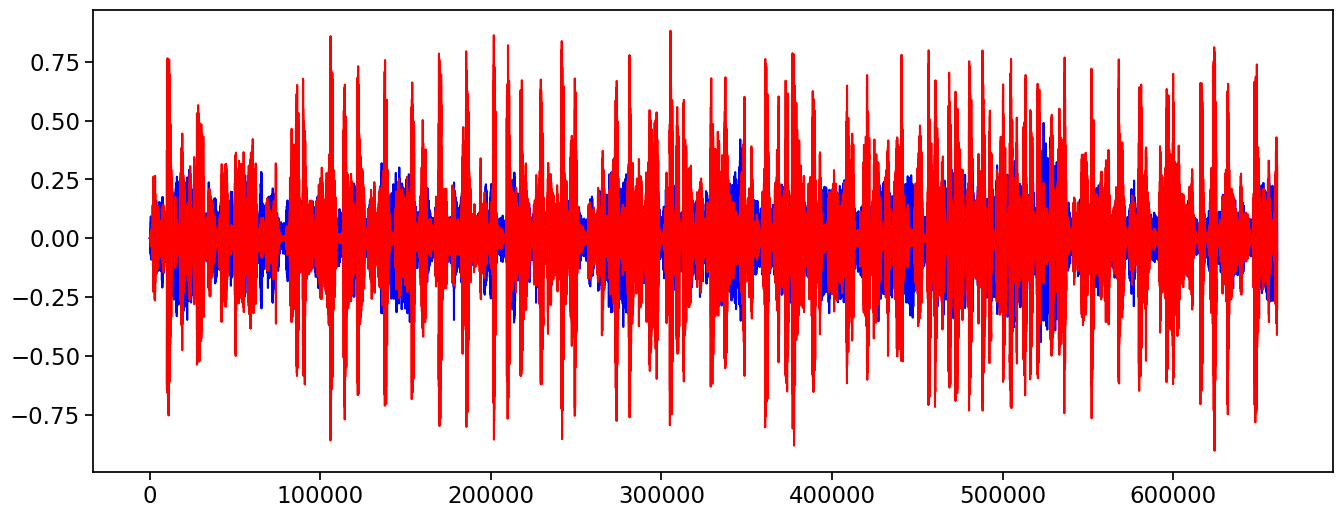

=========== spectral_centroid ===========


/var/folders/np/f11s751j4dj_y_1cj4yxydpwpsr474/T/ipykernel_31862/925715132.py:19: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.25857893 -0.25263396
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_centroids = lb.feature.spectral_centroid(a, sr=s)[0]


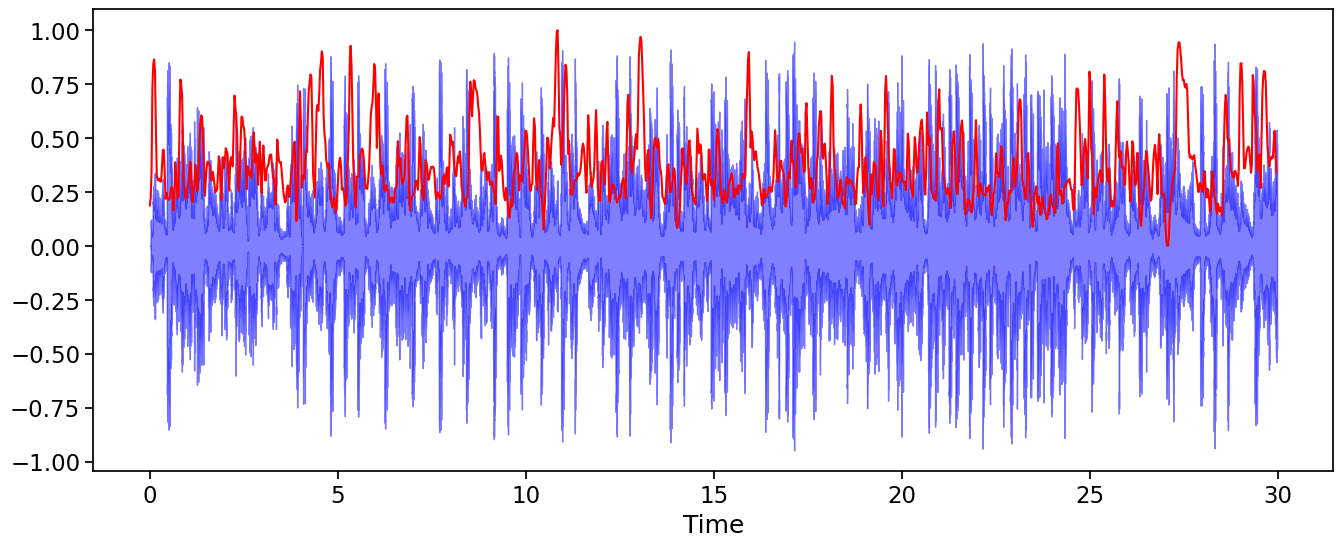

=========== Spectral Rolloff ===========


/var/folders/np/f11s751j4dj_y_1cj4yxydpwpsr474/T/ipykernel_31862/925715132.py:32: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.25857893 -0.25263396
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_rolloff = lb.feature.spectral_rolloff(a, sr=s)[0]


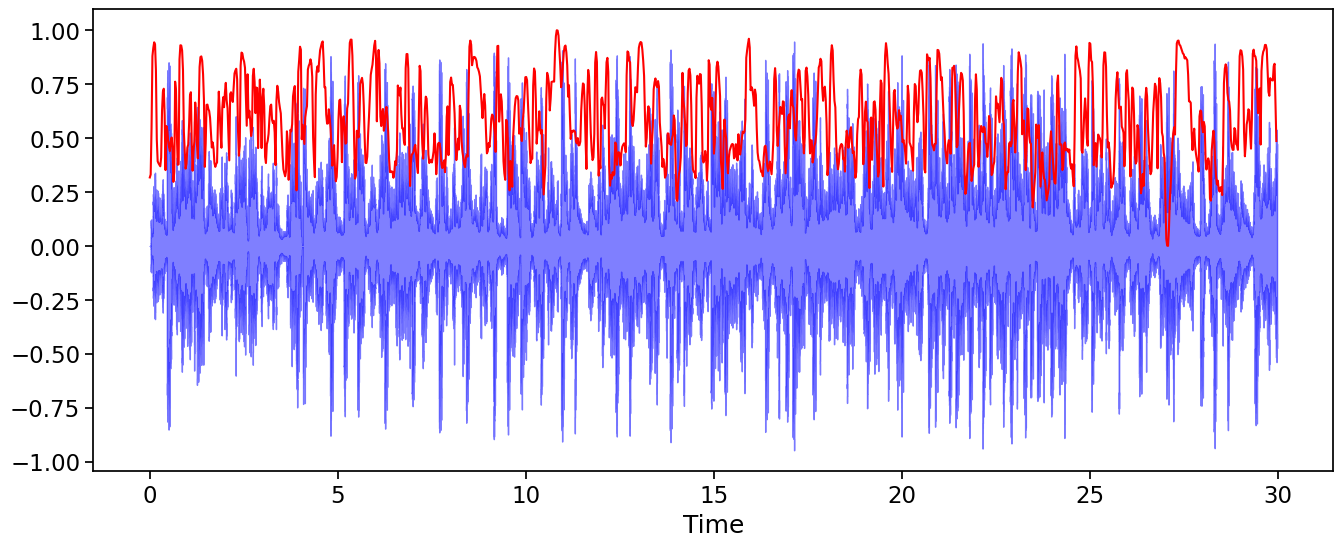

=========== Mel-Frequency Cepstral Coefficients(MFCCs) ===========
mean: 0.52
var: 0.03


/var/folders/np/f11s751j4dj_y_1cj4yxydpwpsr474/T/ipykernel_31862/925715132.py:40: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.25857893 -0.25263396
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = lb.feature.mfcc(a, sr=s)


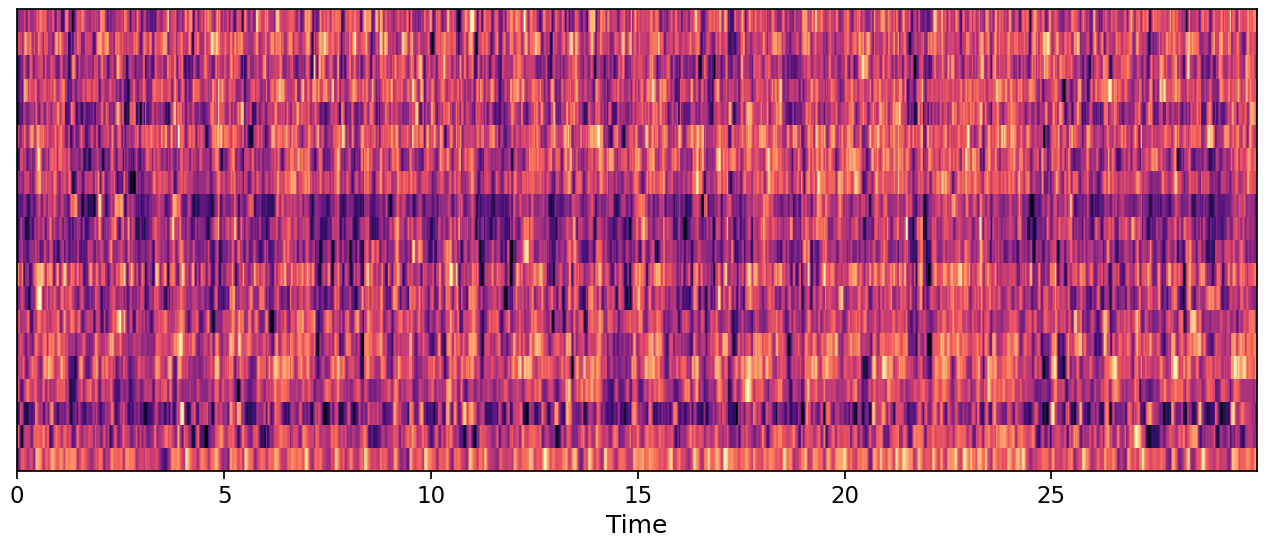

=========== Chroma Frequencies ===========


/var/folders/np/f11s751j4dj_y_1cj4yxydpwpsr474/T/ipykernel_31862/925715132.py:51: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.25857893 -0.25263396
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chromagram = lb.feature.chroma_stft(a, sr=s, hop_length=512)


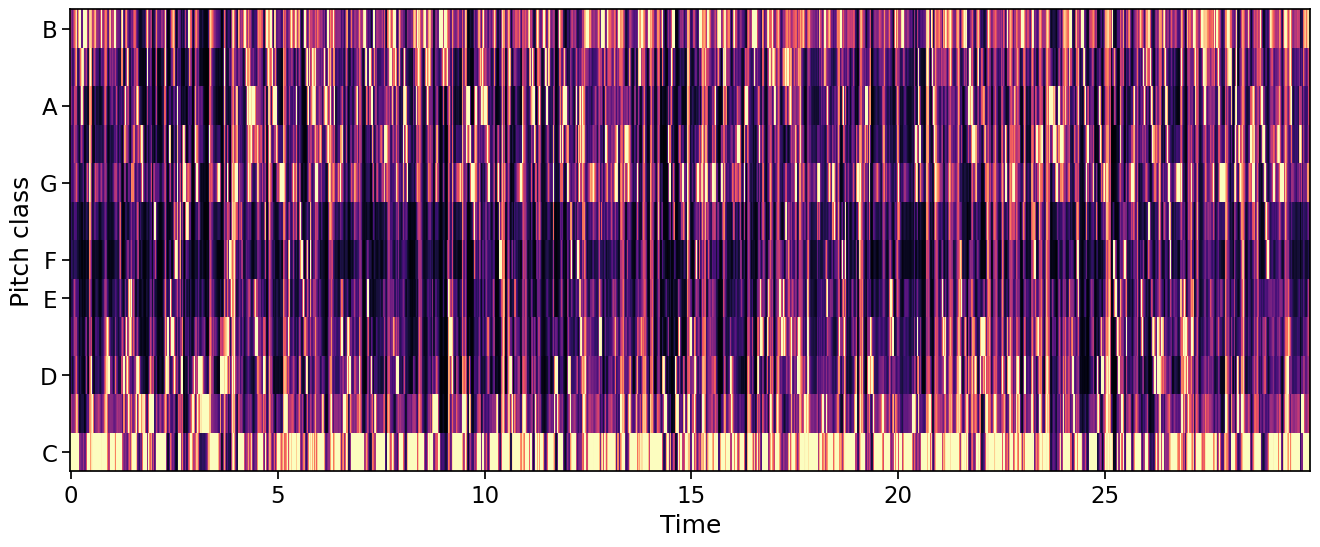

/var/folders/np/f11s751j4dj_y_1cj4yxydpwpsr474/T/ipykernel_31862/925715132.py:3: FutureWarning: Pass y=[0.         0.         0.         ... 0.07602344 0.10268474 0.        ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  tempo, _ = lb.beat.beat_track(a, s)


=========== tempo ===========
99.38401442307692
=========== zero_crossings ===========
[False False False ... False False False]
=========== harmonic and percussive components ===========


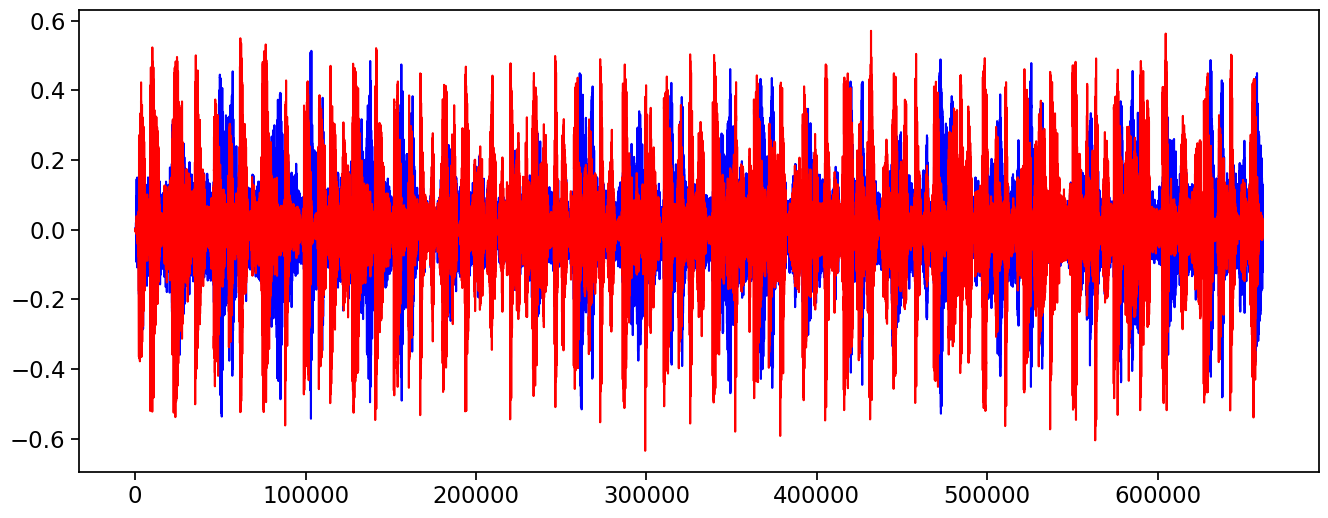

=========== spectral_centroid ===========


/var/folders/np/f11s751j4dj_y_1cj4yxydpwpsr474/T/ipykernel_31862/925715132.py:19: FutureWarning: Pass y=[0.         0.         0.         ... 0.07602344 0.10268474 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_centroids = lb.feature.spectral_centroid(a, sr=s)[0]


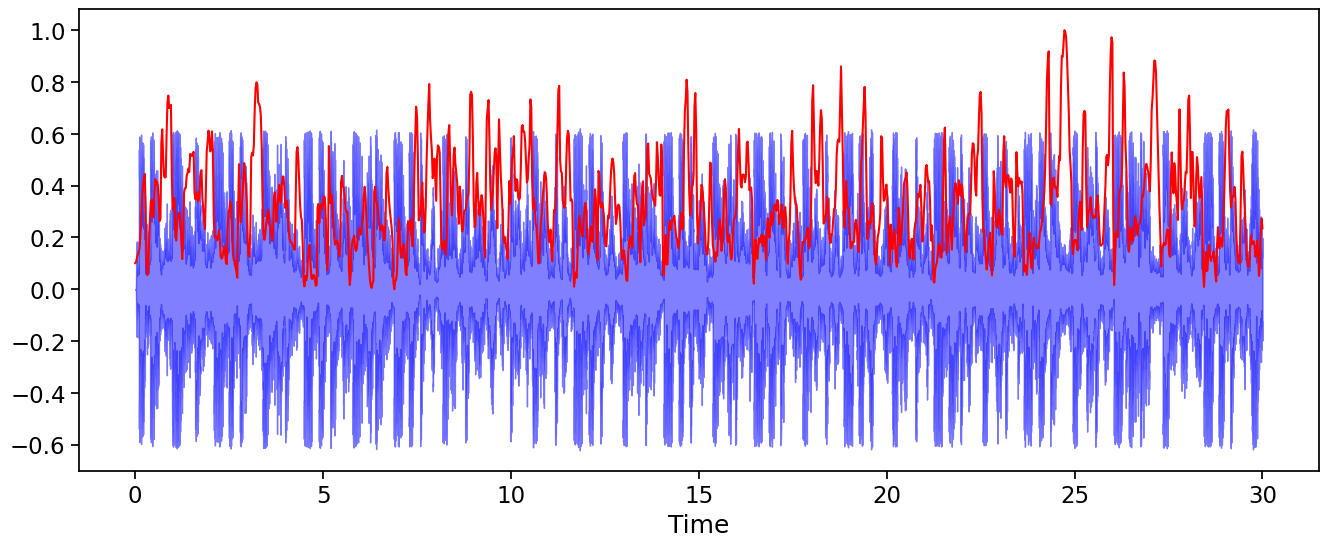

=========== Spectral Rolloff ===========


/var/folders/np/f11s751j4dj_y_1cj4yxydpwpsr474/T/ipykernel_31862/925715132.py:32: FutureWarning: Pass y=[0.         0.         0.         ... 0.07602344 0.10268474 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_rolloff = lb.feature.spectral_rolloff(a, sr=s)[0]


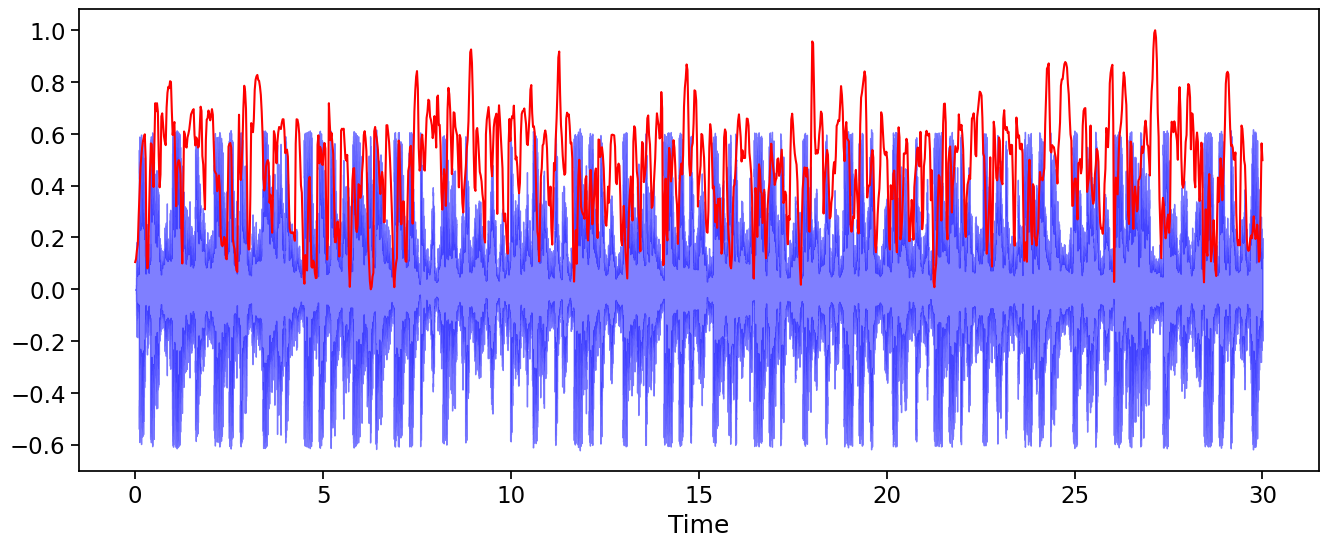

=========== Mel-Frequency Cepstral Coefficients(MFCCs) ===========
mean: 0.51
var: 0.03


/var/folders/np/f11s751j4dj_y_1cj4yxydpwpsr474/T/ipykernel_31862/925715132.py:40: FutureWarning: Pass y=[0.         0.         0.         ... 0.07602344 0.10268474 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = lb.feature.mfcc(a, sr=s)


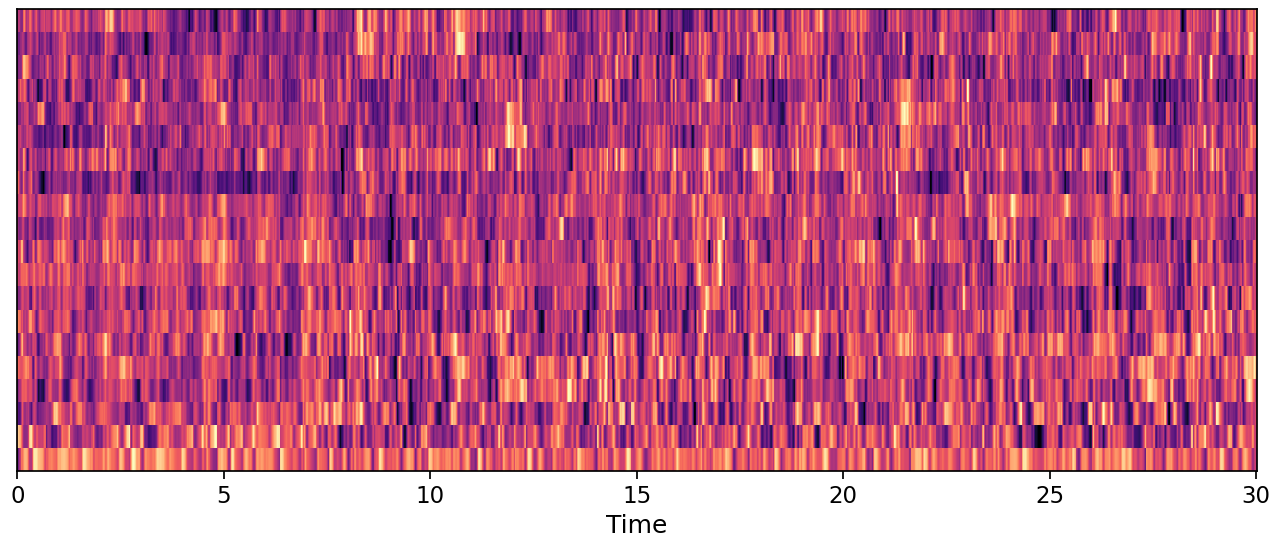

=========== Chroma Frequencies ===========


/var/folders/np/f11s751j4dj_y_1cj4yxydpwpsr474/T/ipykernel_31862/925715132.py:51: FutureWarning: Pass y=[0.         0.         0.         ... 0.07602344 0.10268474 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chromagram = lb.feature.chroma_stft(a, sr=s, hop_length=512)


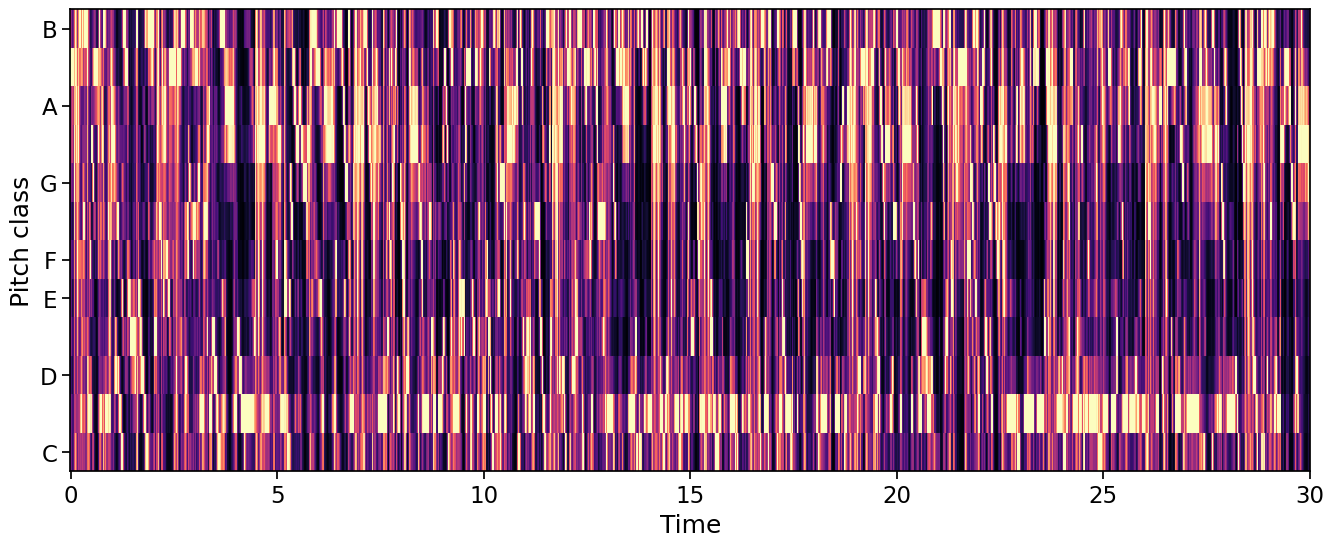

/var/folders/np/f11s751j4dj_y_1cj4yxydpwpsr474/T/ipykernel_31862/925715132.py:3: FutureWarning: Pass y=[0.         0.         0.         ... 0.02636239 0.05029048 0.        ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  tempo, _ = lb.beat.beat_track(a, s)


=========== tempo ===========
107.666015625
=========== zero_crossings ===========
[False False False ... False False False]
=========== harmonic and percussive components ===========


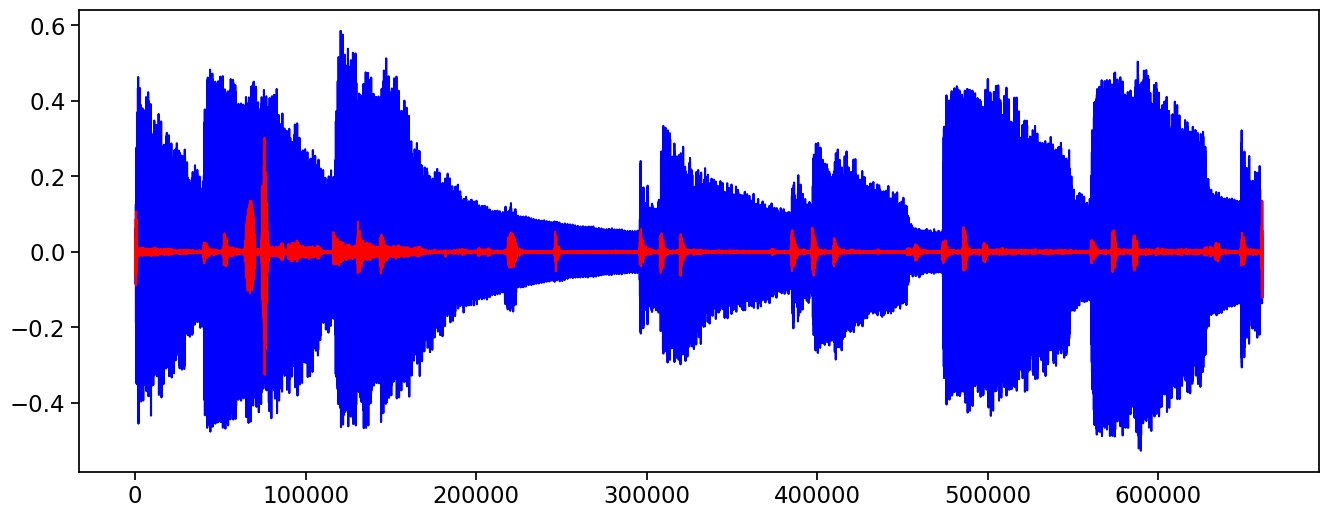

=========== spectral_centroid ===========


/var/folders/np/f11s751j4dj_y_1cj4yxydpwpsr474/T/ipykernel_31862/925715132.py:19: FutureWarning: Pass y=[0.         0.         0.         ... 0.02636239 0.05029048 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_centroids = lb.feature.spectral_centroid(a, sr=s)[0]


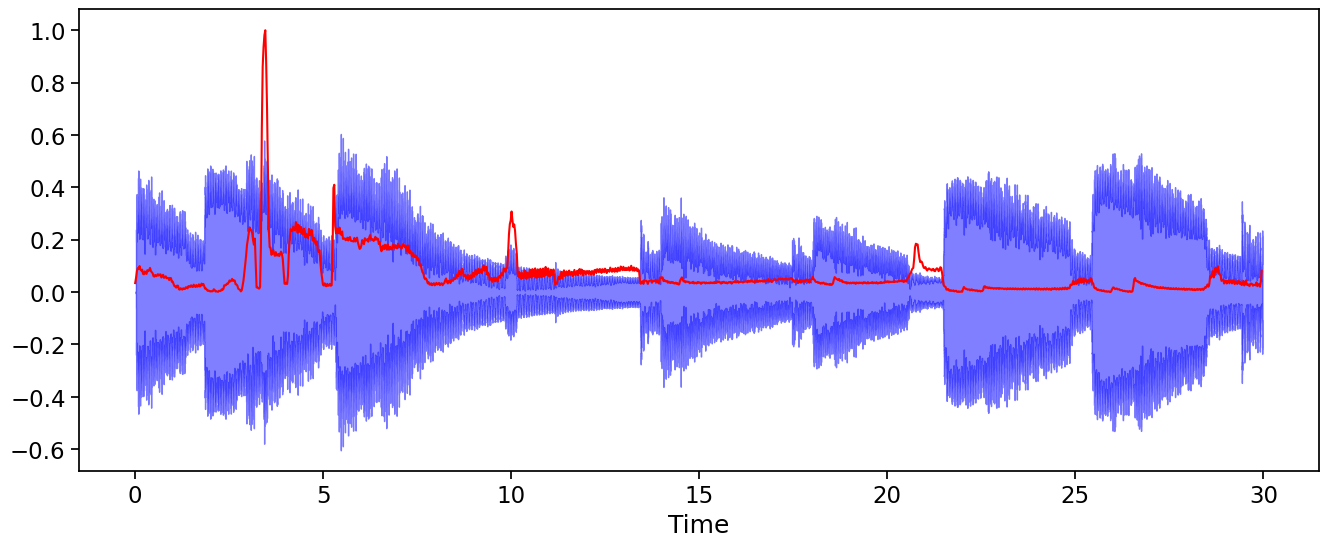

=========== Spectral Rolloff ===========


/var/folders/np/f11s751j4dj_y_1cj4yxydpwpsr474/T/ipykernel_31862/925715132.py:32: FutureWarning: Pass y=[0.         0.         0.         ... 0.02636239 0.05029048 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_rolloff = lb.feature.spectral_rolloff(a, sr=s)[0]


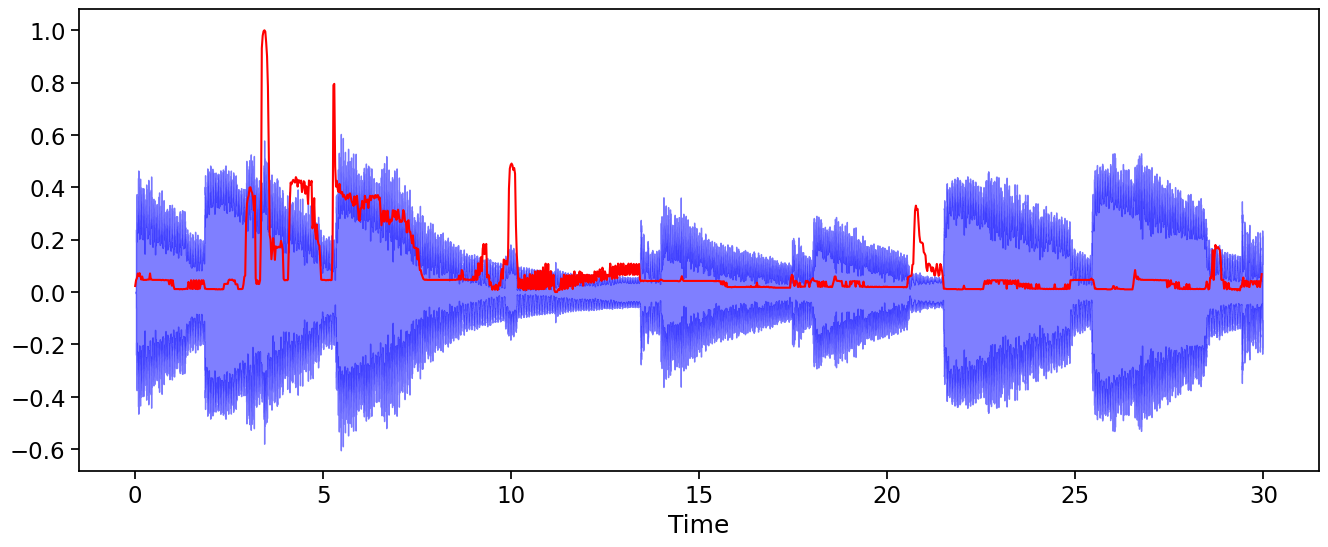

=========== Mel-Frequency Cepstral Coefficients(MFCCs) ===========
mean: 0.51
var: 0.04


/var/folders/np/f11s751j4dj_y_1cj4yxydpwpsr474/T/ipykernel_31862/925715132.py:40: FutureWarning: Pass y=[0.         0.         0.         ... 0.02636239 0.05029048 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = lb.feature.mfcc(a, sr=s)


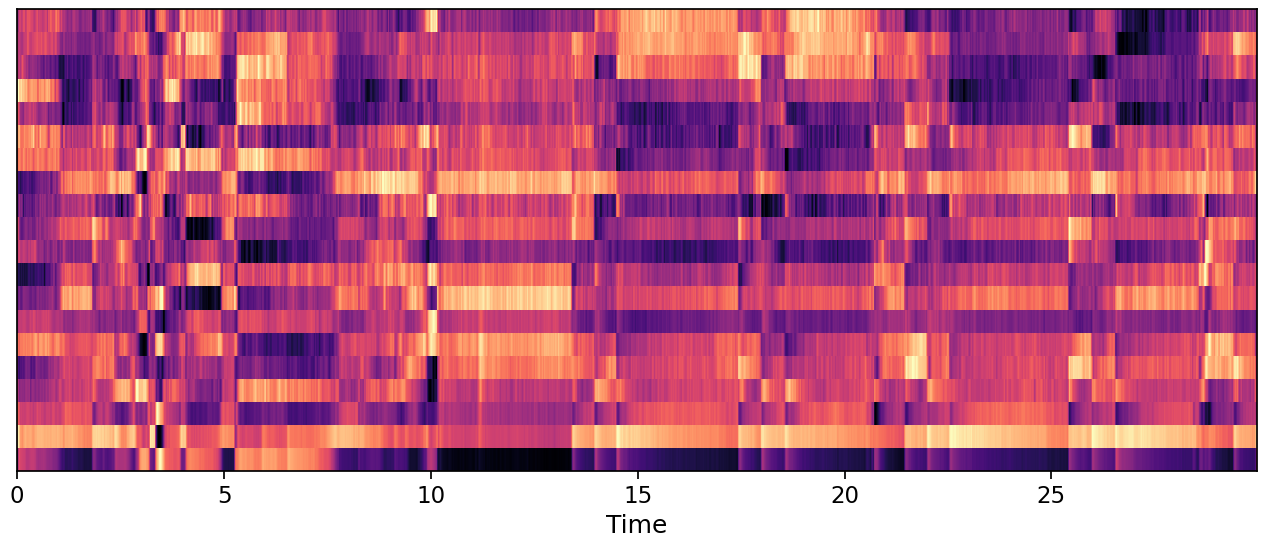

=========== Chroma Frequencies ===========


/var/folders/np/f11s751j4dj_y_1cj4yxydpwpsr474/T/ipykernel_31862/925715132.py:51: FutureWarning: Pass y=[0.         0.         0.         ... 0.02636239 0.05029048 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chromagram = lb.feature.chroma_stft(a, sr=s, hop_length=512)


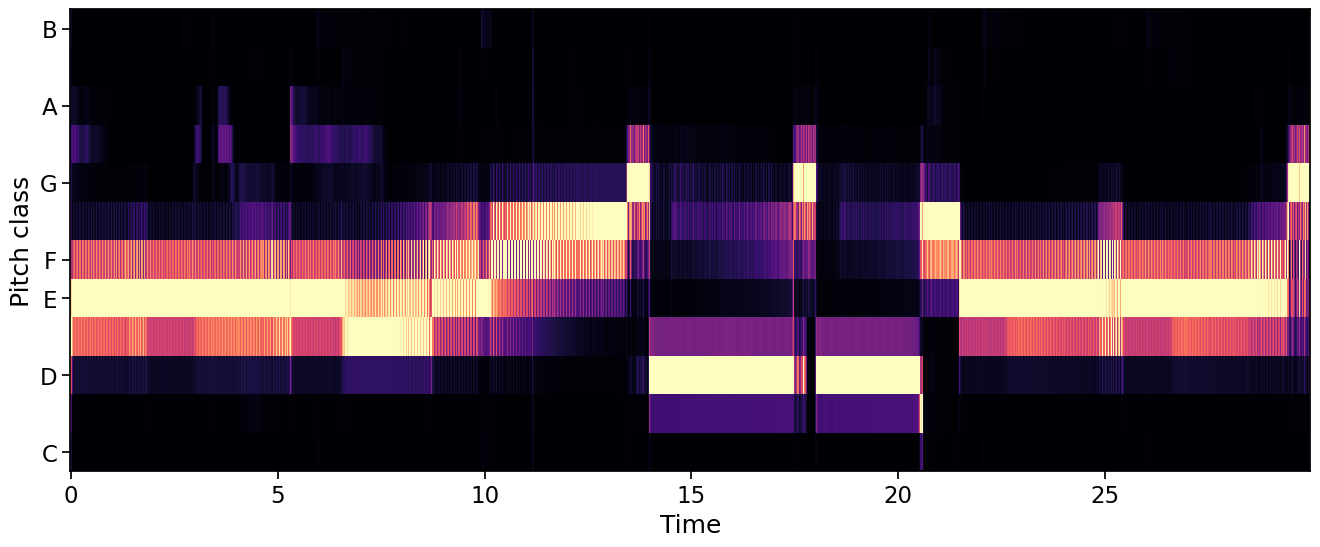

/var/folders/np/f11s751j4dj_y_1cj4yxydpwpsr474/T/ipykernel_31862/925715132.py:3: FutureWarning: Pass y=[0.         0.         0.         ... 0.143883   0.15960321 0.        ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  tempo, _ = lb.beat.beat_track(a, s)


=========== tempo ===========
151.99908088235293
=========== zero_crossings ===========
[False False False ... False False False]
=========== harmonic and percussive components ===========


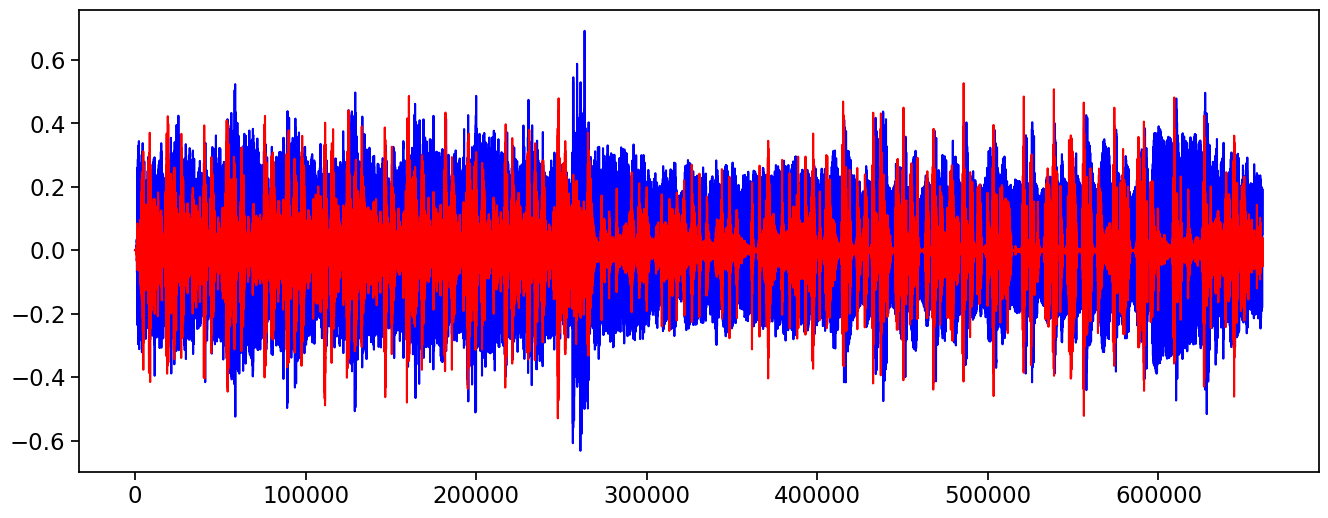

=========== spectral_centroid ===========


/var/folders/np/f11s751j4dj_y_1cj4yxydpwpsr474/T/ipykernel_31862/925715132.py:19: FutureWarning: Pass y=[0.         0.         0.         ... 0.143883   0.15960321 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_centroids = lb.feature.spectral_centroid(a, sr=s)[0]


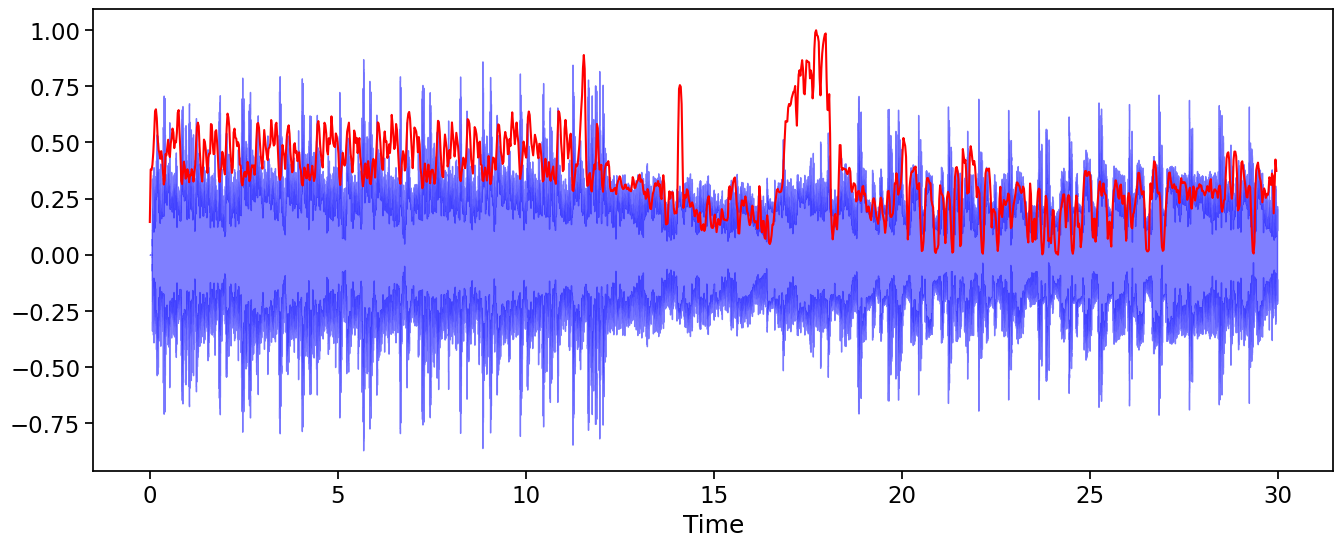

=========== Spectral Rolloff ===========


/var/folders/np/f11s751j4dj_y_1cj4yxydpwpsr474/T/ipykernel_31862/925715132.py:32: FutureWarning: Pass y=[0.         0.         0.         ... 0.143883   0.15960321 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_rolloff = lb.feature.spectral_rolloff(a, sr=s)[0]


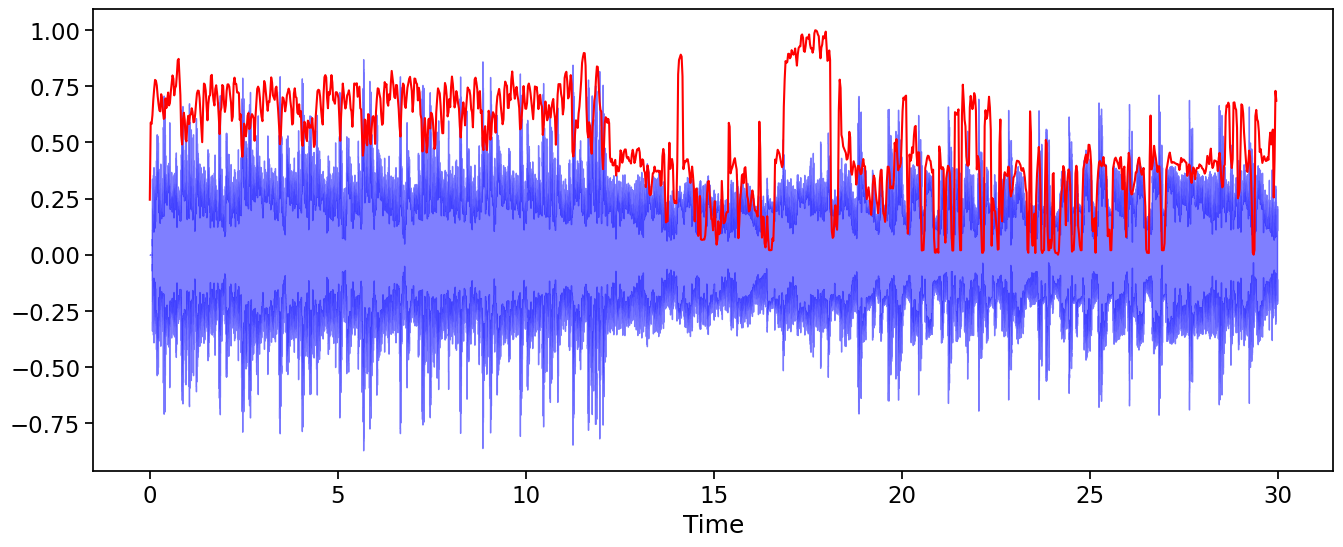

=========== Mel-Frequency Cepstral Coefficients(MFCCs) ===========
mean: 0.51
var: 0.03


/var/folders/np/f11s751j4dj_y_1cj4yxydpwpsr474/T/ipykernel_31862/925715132.py:40: FutureWarning: Pass y=[0.         0.         0.         ... 0.143883   0.15960321 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = lb.feature.mfcc(a, sr=s)


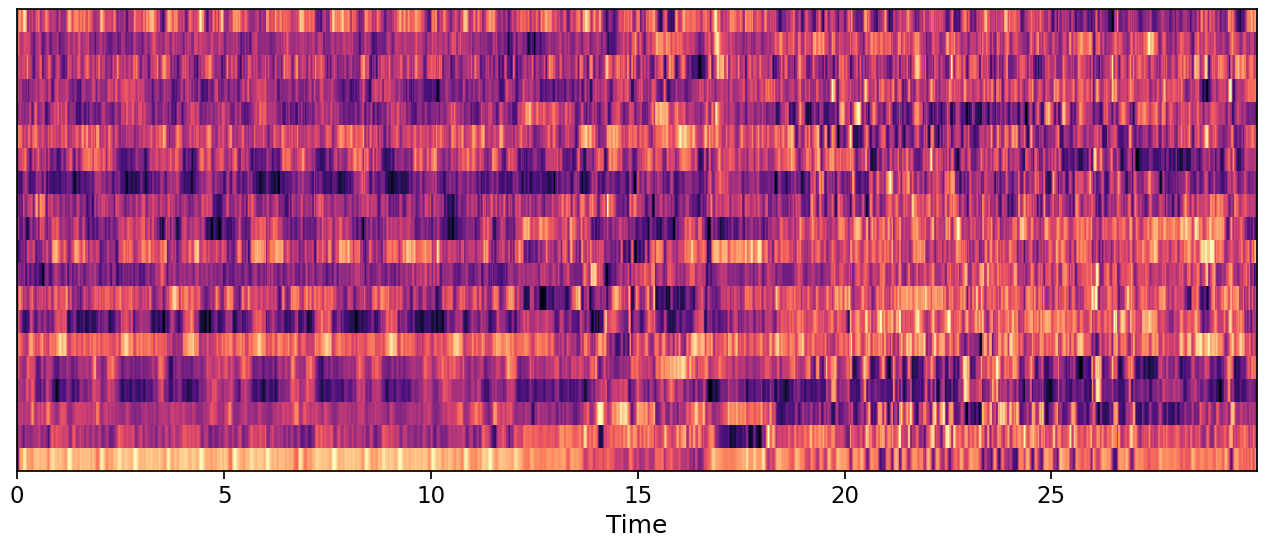

=========== Chroma Frequencies ===========


/var/folders/np/f11s751j4dj_y_1cj4yxydpwpsr474/T/ipykernel_31862/925715132.py:51: FutureWarning: Pass y=[0.         0.         0.         ... 0.143883   0.15960321 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chromagram = lb.feature.chroma_stft(a, sr=s, hop_length=512)


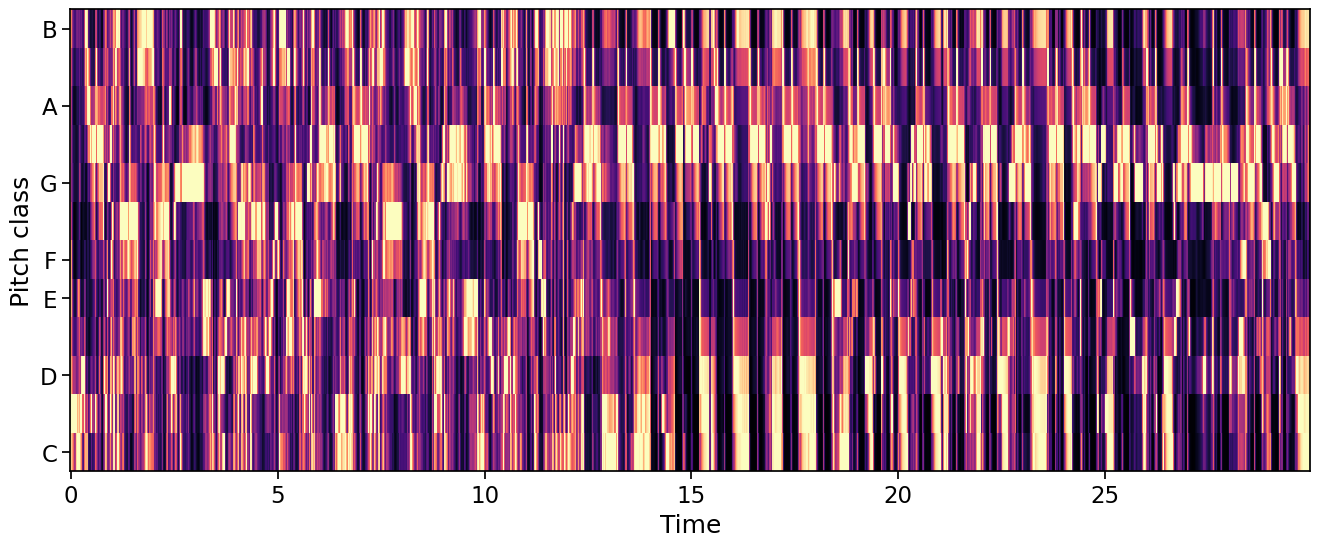

In [35]:
### Audio Feature Extraction
for a, s in zip(audio_data, srate):
  tempo, _ = lb.beat.beat_track(a, s)
  print("=========== tempo ===========")
  print(tempo)
  
  zero_crossings = lb.zero_crossings(a, pad=False)
  print("=========== zero_crossings ===========")
  print(zero_crossings)

  y_harm, y_perc = lb.effects.hpss(a)
  print("=========== harmonic and percussive components ===========")
  plt.figure(figsize=(16,6))
  plt.plot(y_harm, color='b')
  plt.plot(y_perc, color='r')
  plt.show()

  print("=========== spectral_centroid ===========")
  spectral_centroids = lb.feature.spectral_centroid(a, sr=s)[0]
  frames = range(len(spectral_centroids))
  t = lb.frames_to_time(frames)
  import sklearn
  def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

  plt.figure(figsize=(16,6))
  lb.display.waveshow(a, sr=sr, alpha=0.5, color='b')
  plt.plot(t, normalize(spectral_centroids), color='r')
  plt.show()

  print("=========== Spectral Rolloff ===========")
  spectral_rolloff = lb.feature.spectral_rolloff(a, sr=s)[0]

  plt.figure(figsize=(16,6))
  lb.display.waveshow(a, sr=s, alpha=0.5,color='b')
  plt.plot(t, normalize(spectral_rolloff),color='r')
  plt.show()

  print("=========== Mel-Frequency Cepstral Coefficients(MFCCs) ===========")
  mfccs = lb.feature.mfcc(a, sr=s)
  mfccs = normalize(mfccs,axis=1)

  print('mean: %.2f' % mfccs.mean())
  print('var: %.2f' % mfccs.var())

  plt.figure(figsize=(16,6))
  lb.display.specshow(mfccs,sr=sr, x_axis='time')
  plt.show()

  print("=========== Chroma Frequencies ===========")
  chromagram = lb.feature.chroma_stft(a, sr=s, hop_length=512)

  plt.figure(figsize=(16,6))
  lb.display.specshow(chromagram,x_axis='time', y_axis='chroma', hop_length=512)
  plt.show()

In [51]:
import librosa as lb
y, sr = lb.load('../datasets/fma_small_flatten/000005.mp3')
lb.feature.chroma_stft(y=y, sr=sr).shape


(12, 1293)

In [52]:
spec_c = lb.feature.spectral_centroid(y=y, sr=sr).shape


In [53]:
spec_r = lb.feature.spectral_rolloff(y=y, sr=sr).shape

In [55]:
zc = lb.zero_crossings(y)

In [60]:
y_harmonic, y_percussive = lb.effects.hpss(y)
har = lb.feature.rms(y=y_harmonic)
per = lb.feature.rms(y=y_percussive)

In [62]:
mfcc = lb.feature.mfcc(y=y, sr=sr, n_mfcc=20)

In [63]:
import numpy as np
croma_shtft = lb.feature.chroma_stft(y=y, sr=sr)

In [64]:
np.mean(croma_shtft, axis=1)

array([0.40881258, 0.5783515 , 0.39788106, 0.33910877, 0.321835  ,
       0.32905874, 0.37333208, 0.39834583, 0.4884637 , 0.4918633 ,
       0.50771946, 0.45749438], dtype=float32)

In [67]:
np.var(croma_shtft, axis=1)

array([0.06742936, 0.10742889, 0.06647014, 0.0693041 , 0.06583852,
       0.07151243, 0.08165012, 0.08053584, 0.10874283, 0.10551822,
       0.10182077, 0.09584082], dtype=float32)

In [68]:
np.mean(har)

0.07955334

In [69]:
np.var(har)

0.002229816

In [73]:
len(np.mean(mfcc, axis=1))

20

In [72]:
len(np.var(mfcc, axis=1))

20